# Project 1 - Building & Evaluating ML Algorithms

---

1. Apply the necessary data preprocessing using ```scikit-learn``` pipelines. Justify all choices. The only requirements regarding attribute encoding are:

    1. Encode the attribute ```Date``` with the respective day of the week (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday).
    2. Encode the attribute ```Time``` into 4 categories: Morning (10:00 - 11:59), Afternoon (12:00 - 17:00), Evening (17:01 - 19:00) and Night (19:01 - 21:00).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
supermarket = pd.read_csv('supermarket_sales.csv')
supermarket

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
print(supermarket.shape)
supermarket.info()

(1000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income  

#### There are no missing data, no imputer is needed

In [4]:
supermarket['Invoice ID'].value_counts()

750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: Invoice ID, Length: 1000, dtype: int64

In [5]:
supermarket_City = supermarket['City'].replace(['Yangon', 'Mandalay', 'Naypyitaw'], ['A','B','C'])
for i in range(len(supermarket['City'])):
    print(supermarket_City[i] == supermarket['Branch'][i])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [6]:
total_cogs = supermarket['Total']/supermarket['cogs']
total_cogs.value_counts()

1.05    801
1.05    184
1.05     15
dtype: int64

In [7]:
supermarket['gross margin percentage'].value_counts()

4.761905    1000
Name: gross margin percentage, dtype: int64

Attribute ```Invoice ID``` is just the identification number, it's not imformative and useless in the data.

Attribute ```City ``` represents the same thing as ```Branch```, each City matches with one of the branch, so we only have to keep one of them. Since ```Branch``` states the easier one, I decide to keep ```Branch```.

Attribute ```Total``` is ```cogs``` times ```gross margin percentage```, and ```gross margin percentage``` is the same in all rows. So ```Total``` is basically the same as ```cogs```and there is no need to keep it.

Attribute ```cogs``` is ```Unit price``` times ```Quantity```, and we can get ```gross income```by multiply ```cogs``` with 0.05. Since ```gross income``` is one of our target, we decide to eliminate ```cogs```.

Attribute ```gross margin percentage``` is the same in every rows. There is no need to keep it.

In [8]:
supermarket = supermarket.drop(['Invoice ID', 'City', 'Total', 'cogs', 'gross margin percentage'], axis=1)
supermarket

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,gross income,Rating
0,A,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,26.1415,9.1
1,C,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,3.8200,9.6
2,A,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,16.2155,7.4
3,A,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,23.2880,8.4
4,A,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...
995,C,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46,Ewallet,2.0175,6.2
996,B,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16,Ewallet,48.6900,4.4
997,A,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22,Cash,1.5920,7.7
998,A,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33,Cash,3.2910,4.1


In [9]:
corr = supermarket.corr(method='pearson')
corr

,Unit price,Quantity,gross income,Rating
Unit price,1.000000,0.010778,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,-0.015815
gross income,0.633962,0.705510,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,1.000000


#### Since ```Rating``` barely contribute to the data, I decide to drop it.

In [10]:
supermarket = supermarket.drop(['Rating'], axis=1)
supermarket

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,gross income
0,A,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,26.1415
1,C,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,3.8200
2,A,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,16.2155
3,A,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,23.2880
4,A,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,30.2085
...,...,...,...,...,...,...,...,...,...,...
995,C,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46,Ewallet,2.0175
996,B,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16,Ewallet,48.6900
997,A,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22,Cash,1.5920
998,A,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33,Cash,3.2910


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin 
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [12]:
# pipeline for date and time
# encode the date to str-day
class Date_to_day(BaseEstimator, TransformerMixin):
    def __init__ (self, transfer_to_day=True):
        self.transfer_to_day = transfer_to_day
    def fit(self, X, y=None): 
        return self 
    def transform(self, X): 
        if self.transfer_to_day: 
            date = pd.to_datetime(X).dt.day_name()
            day = date.to_numpy()
        return day
date_pipeline = Pipeline([('Date_to_day', Date_to_day())])

date_day = date_pipeline.fit_transform(supermarket['Date'])
supermarket['Date'] = date_day

In [13]:
# encode the time to timeslot
class Time_to_timeslot(BaseEstimator, TransformerMixin):
    def __init__ (self, Time_to_timeslot=True):
        self.Time_to_timeslot = Time_to_timeslot
    def fit(self, X, y=None): 
        return self 
    def transform(self, X): 
        if self.Time_to_timeslot: 
            hour = pd.to_datetime(X).dt.hour
            timeslot = []
            for i in range(len(X)):
                if hour[i]>=10 and hour[i]<=11:
                    timeslot.append('Morning')
                elif hour[i]>=12 and hour[i]<17:
                    timeslot.append('Afternoon')
                elif hour[i]>=17 and hour[i]<19:
                    timeslot.append('Evening')
                elif hour[i]>=19 and hour[i]<21:
                    timeslot.append('Night')
        return timeslot
time_pipeline = Pipeline([('Time_to_timeslot', Time_to_timeslot())])

time_slot = time_pipeline.fit_transform(supermarket['Time'])
supermarket['Time'] = time_slot

In [14]:
supermarket

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,gross income
0,A,Member,Female,Health and beauty,74.69,7,Saturday,Afternoon,Ewallet,26.1415
1,C,Normal,Female,Electronic accessories,15.28,5,Friday,Morning,Cash,3.8200
2,A,Normal,Male,Home and lifestyle,46.33,7,Sunday,Afternoon,Credit card,16.2155
3,A,Member,Male,Health and beauty,58.22,8,Sunday,Night,Ewallet,23.2880
4,A,Normal,Male,Sports and travel,86.31,7,Friday,Morning,Ewallet,30.2085
...,...,...,...,...,...,...,...,...,...,...
995,C,Normal,Male,Health and beauty,40.35,1,Tuesday,Afternoon,Ewallet,2.0175
996,B,Normal,Female,Home and lifestyle,97.38,10,Saturday,Evening,Ewallet,48.6900
997,A,Member,Male,Food and beverages,31.84,1,Saturday,Afternoon,Cash,1.5920
998,A,Normal,Male,Home and lifestyle,65.82,1,Friday,Afternoon,Cash,3.2910


#### Due to the inconvinence and to make sure the time slot is consistent, I change time margin from Morning (10:00 - 11:59), Afternoon (12:00 - 17:00), Evening (17:01 - 19:00) and Night (19:01 - 21:00)    to    Morning (10:00 - 11:59), Afternoon (12:00 - 16:59), Evening (17:00 - 18:59) and Night (19:00 - 20:59)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_set, test_set = train_test_split(supermarket, test_size=0.2, shuffle=True, random_state=42)
print(train_set.shape, test_set.shape)

(800, 10) (200, 10)


In [17]:
train_set

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,gross income
29,A,Normal,Male,Health and beauty,24.89,9,Friday,Afternoon,Cash,11.2005
535,C,Normal,Male,Home and lifestyle,16.67,7,Thursday,Morning,Ewallet,5.8345
695,A,Member,Female,Home and lifestyle,87.37,5,Tuesday,Night,Cash,21.8425
557,C,Member,Female,Food and beverages,98.52,10,Wednesday,Night,Ewallet,49.2600
836,A,Member,Male,Fashion accessories,38.54,5,Wednesday,Afternoon,Ewallet,9.6350
...,...,...,...,...,...,...,...,...,...,...
106,C,Normal,Male,Fashion accessories,27.38,6,Saturday,Night,Credit card,8.2140
270,B,Normal,Female,Sports and travel,67.43,5,Wednesday,Evening,Ewallet,16.8575
860,C,Member,Female,Home and lifestyle,86.27,1,Wednesday,Afternoon,Ewallet,4.3135
435,C,Normal,Male,Sports and travel,99.24,9,Tuesday,Night,Ewallet,44.6580


In [18]:
test_set

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,gross income
521,C,Member,Female,Home and lifestyle,83.17,6,Wednesday,Morning,Cash,24.9510
737,C,Normal,Male,Electronic accessories,58.76,10,Tuesday,Afternoon,Ewallet,29.3800
740,C,Normal,Male,Home and lifestyle,55.61,7,Saturday,Afternoon,Cash,19.4635
660,B,Normal,Female,Sports and travel,42.97,3,Sunday,Morning,Cash,6.4455
411,B,Normal,Male,Sports and travel,21.87,2,Friday,Afternoon,Ewallet,2.1870
...,...,...,...,...,...,...,...,...,...,...
408,A,Normal,Female,Home and lifestyle,56.53,4,Monday,Night,Ewallet,11.3060
332,A,Normal,Male,Fashion accessories,77.02,5,Sunday,Afternoon,Cash,19.2550
208,B,Normal,Female,Fashion accessories,30.37,3,Thursday,Afternoon,Ewallet,4.5555
613,C,Member,Male,Sports and travel,80.93,1,Saturday,Afternoon,Credit card,4.0465


In [19]:
# pipeline for numerical attributes
num_attributes = ['Unit price', 'Quantity', 'gross income']
num_pipeline = Pipeline([('Standard_Scaler', StandardScaler())])

In [20]:
# pipeline for other categorical attributes
# integer encoding
cat_attributes_inte = ['Customer type', 'Gender']
cat_inte_pipeline = Pipeline([('ordinal', OrdinalEncoder())])
# one hot encoding
cat_attributes_one = ['Branch', 'Product line', 'Date', 'Time', 'Payment']
cat_one_pipeline = Pipeline([('one_hot', OneHotEncoder())])

In [21]:
One = OneHotEncoder()
# help me categorize the name of each column after on-hot encoding
One.fit(supermarket['Branch'].to_numpy().reshape(-1,1))
print(One.categories_)
One.fit(supermarket['Product line'].to_numpy().reshape(-1,1))
print(One.categories_)
One.fit(supermarket['Date'].to_numpy().reshape(-1,1))
print(One.categories_)
One.fit(supermarket['Time'].to_numpy().reshape(-1,1))
print(One.categories_)
One.fit(supermarket['Payment'].to_numpy().reshape(-1,1))
print(One.categories_)

Interger = OrdinalEncoder()
Interger.fit(supermarket['Gender'].to_numpy().reshape(-1,1))
print(Interger.categories_)
Interger.fit(supermarket['Customer type'].to_numpy().reshape(-1,1))
print(Interger.categories_)
Interger.fit(supermarket['Date'].to_numpy().reshape(-1,1))
print(Interger.categories_)

[array(['A', 'B', 'C'], dtype=object)]
[array(['Electronic accessories', 'Fashion accessories',
       'Food and beverages', 'Health and beauty', 'Home and lifestyle',
       'Sports and travel'], dtype=object)]
[array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)]
[array(['Afternoon', 'Evening', 'Morning', 'Night'], dtype=object)]
[array(['Cash', 'Credit card', 'Ewallet'], dtype=object)]
[array(['Female', 'Male'], dtype=object)]
[array(['Member', 'Normal'], dtype=object)]
[array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)]


#### The reason I choose to use two encoding methods is that ```Customer type``` and ```Gender``` are binary attributes, there is no need to use one-hot-encoding and increase the number of columns.

In [22]:
from sklearn.compose import ColumnTransformer

In [23]:
# introduce columntransformer to combine pipeline
Full_pipeline = ColumnTransformer([('num', num_pipeline, num_attributes),
                                  ('cat_int', cat_inte_pipeline, cat_attributes_inte),
                                  ('cat_one', cat_one_pipeline, cat_attributes_one)])

train = Full_pipeline.fit_transform(train_set)
test = Full_pipeline.transform(test_set)

In [24]:
train_final = pd.DataFrame(train, 
                           columns=np.hstack((num_attributes, cat_attributes_inte, 
                        ['Branch_A', 'Branch_B', 'Branch_C', 'Electronic accessories', 
                         'Fashion accessories', 'Food and beverages', 'Health and beauty',
                         'Home and lifestyle', 'Sports and travel','Friday', 'Monday', 'Saturday',
                         'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Afternoon', 'Evening',
                         'Morning', 'Night', 'Cash', 'Credit card', 'Ewallet'])), 
                           index=train_set.index)
train_final

,Unit price,Quantity,gross income,Customer type,Gender,Branch_A,Branch_B,Branch_C,Electronic accessories,Fashion accessories,...,Thursday,Tuesday,Wednesday,Afternoon,Evening,Morning,Night,Cash,Credit card,Ewallet
29,-1.160308,1.184657,-0.345462,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
535,-1.473301,0.507468,-0.808736,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
695,1.218746,-0.169720,0.573317,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
557,1.643305,1.523251,2.940413,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
836,-0.640556,-0.169720,-0.480619,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-1.065496,0.168874,-0.603302,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
270,0.459490,-0.169720,0.142937,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
860,1.176862,-1.524097,-0.940052,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
435,1.670721,1.184657,2.543098,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [25]:
test_final = pd.DataFrame(test, 
                           columns=np.hstack((num_attributes, cat_attributes_inte, 
                        ['Branch_A', 'Branch_B', 'Branch_C', 'Electronic accessories', 
                         'Fashion accessories', 'Food and beverages', 'Health and beauty',
                         'Home and lifestyle', 'Sports and travel','Friday', 'Monday', 'Saturday',
                         'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Afternoon', 'Evening',
                         'Morning', 'Night', 'Cash', 'Credit card', 'Ewallet'])), 
                           index=test_set.index)
test_final

,Unit price,Quantity,gross income,Customer type,Gender,Branch_A,Branch_B,Branch_C,Electronic accessories,Fashion accessories,...,Thursday,Tuesday,Wednesday,Afternoon,Evening,Morning,Night,Cash,Credit card,Ewallet
521,1.058823,0.168874,0.841690,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
737,0.129362,1.523251,1.224069,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
740,0.009419,0.507468,0.367926,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
660,-0.471875,-0.846909,-0.755985,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
411,-1.275300,-1.185503,-1.123644,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.044450,-0.508315,-0.336353,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
332,0.824649,-0.169720,0.349925,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
208,-0.951645,-0.846909,-0.919159,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
613,0.973530,-1.524097,-0.963104,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
import joblib

In [27]:
# to evaluate the correlated value of whole dataset after preprocessing, I stack the final train and test set.
data = np.vstack((train_final, test_final))
index = np.hstack((train_set.index, test_set.index))
data_set = pd.DataFrame(data, columns=np.hstack((num_attributes, cat_attributes_inte, 
                        ['Branch_A', 'Branch_B', 'Branch_C', 'Electronic accessories', 
                         'Fashion accessories', 'Food and beverages', 'Health and beauty',
                         'Home and lifestyle', 'Sports and travel','Friday', 'Monday', 'Saturday',
                         'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Afternoon', 'Evening',
                         'Morning', 'Night', 'Cash', 'Credit card', 'Ewallet'])),
                       index = index)
joblib.dump(data_set, 'data_set.pkl')# store final data for problem 2~3 to file
data_set

,Unit price,Quantity,gross income,Customer type,Gender,Branch_A,Branch_B,Branch_C,Electronic accessories,Fashion accessories,...,Thursday,Tuesday,Wednesday,Afternoon,Evening,Morning,Night,Cash,Credit card,Ewallet
29,-1.160308,1.184657,-0.345462,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
535,-1.473301,0.507468,-0.808736,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
695,1.218746,-0.169720,0.573317,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
557,1.643305,1.523251,2.940413,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
836,-0.640556,-0.169720,-0.480619,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.044450,-0.508315,-0.336353,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
332,0.824649,-0.169720,0.349925,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
208,-0.951645,-0.846909,-0.919159,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
613,0.973530,-1.524097,-0.963104,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Target in problem 6 is date. Instead of re-do all the pipelines, I decided to inverse on-hot encoding and do integer encoding so I only have to predict the target in single column.

In [28]:
day = data_set[['Monday', 'Tuesday', 'Wednesday',
             'Thursday', 'Friday', 'Saturday',
               'Sunday']]
day

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
29,0.0,0.0,0.0,0.0,1.0,0.0,0.0
535,0.0,0.0,0.0,1.0,0.0,0.0,0.0
695,0.0,1.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,1.0,0.0,0.0,0.0,0.0
836,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
408,1.0,0.0,0.0,0.0,0.0,0.0,0.0
332,0.0,0.0,0.0,0.0,0.0,0.0,1.0
208,0.0,0.0,0.0,1.0,0.0,0.0,0.0
613,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
date_integer = Interger.fit_transform(day.idxmax(axis=1).to_numpy().reshape(-1,1))
print(Interger.categories_)
date_integer

[array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)]


array([[0.],
       [4.],
       [5.],
       [6.],
       [6.],
       [0.],
       [1.],
       [0.],
       [6.],
       [4.],
       [6.],
       [0.],
       [4.],
       [5.],
       [4.],
       [3.],
       [4.],
       [1.],
       [3.],
       [3.],
       [5.],
       [0.],
       [6.],
       [5.],
       [0.],
       [3.],
       [2.],
       [0.],
       [4.],
       [2.],
       [4.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [5.],
       [2.],
       [2.],
       [4.],
       [3.],
       [0.],
       [2.],
       [1.],
       [2.],
       [3.],
       [4.],
       [2.],
       [2.],
       [3.],
       [6.],
       [4.],
       [4.],
       [6.],
       [5.],
       [0.],
       [4.],
       [4.],
       [0.],
       [1.],
       [4.],
       [2.],
       [2.],
       [4.],
       [6.],
       [5.],
       [0.],
       [0.],
       [5.],
       [5.],
       [6.],
       [2.],
       [1.],
       [2.],
       [5.],
       [6.],
       [5.],

In [30]:
data_day = np.hstack((data_set.drop(['Friday', 'Monday', 'Saturday',
                                     'Sunday', 'Thursday', 'Tuesday',
                                     'Wednesday'], axis=1),
                      date_integer))
data_day = pd.DataFrame(data_day, columns=np.hstack((num_attributes, cat_attributes_inte, 
                        ['Branch_A', 'Branch_B', 'Branch_C', 'Electronic accessories', 
                         'Fashion accessories', 'Food and beverages', 'Health and beauty',
                         'Home and lifestyle', 'Sports and travel', 'Afternoon', 'Evening',
                         'Morning', 'Night', 'Cash', 'Credit card', 'Ewallet', 'Date'])),
                      index=data_set.index)
joblib.dump(data_day, 'data_day.pkl')# store final data for problem 6 to file
data_day

,Unit price,Quantity,gross income,Customer type,Gender,Branch_A,Branch_B,Branch_C,Electronic accessories,Fashion accessories,...,Home and lifestyle,Sports and travel,Afternoon,Evening,Morning,Night,Cash,Credit card,Ewallet,Date
29,-1.160308,1.184657,-0.345462,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
535,-1.473301,0.507468,-0.808736,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0
695,1.218746,-0.169720,0.573317,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0
557,1.643305,1.523251,2.940413,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0
836,-0.640556,-0.169720,-0.480619,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.044450,-0.508315,-0.336353,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
332,0.824649,-0.169720,0.349925,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
208,-0.951645,-0.846909,-0.919159,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
613,0.973530,-1.524097,-0.963104,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


For what follows, use the coefficient of determination, $r^2$, as one of your metrics of success and report its 95% confidence interval. Carry any necessary hyperparameter tuning with pipelines. Choose the best CV strategy and report on the best hyperparameter settings.

2. Train a multiple linear regression with and without Lasso regularization to **predict ```gross income```**.

    1. How is the gross income affected by unit price, quantity, and other variables like day, time slot, and product line in general?
    
    4. When using Lasso regularizer, which value for the hyperparameter $\lambda$ best works for this dataset? Which features were excluded in this model, if any?

In [31]:
X_train1 = train_final.drop('gross income', axis=1).to_numpy()
t_train1 = train_final['gross income'].to_numpy()
X_test1 = test_final.drop('gross income', axis=1).to_numpy()
t_test1 = test_final['gross income'].to_numpy()
print(X_train1.shape, t_train1.shape)
print(X_test1.shape, t_test1.shape)

(800, 27) (800,)
(200, 27) (200,)


#### Instead of only using attributes ```unit price```, ```quantity```, ```day```, ```timeslot```, and ```product line```, I decide to use all attributes. The reason to it is because even though I use all attributes, I can still see how gross income is affected by unit price, quantity, and other variables like day, timeslot, and product line. Moreover, by using all attributes, I could have higher possibility to acquire higher coefficient of determination in both train and test set.

In [32]:
corr = data_set.corr(method='pearson')
corr['gross income'].sort_values(ascending=False)

gross income              1.000000
Quantity                  0.705510
Unit price                0.633962
Branch_C                  0.040176
Saturday                  0.034662
Home and lifestyle        0.024276
Night                     0.020321
Sunday                    0.018014
Sports and travel         0.016517
Afternoon                 0.011413
Cash                      0.009474
Thursday                  0.009200
Tuesday                   0.005059
Credit card               0.002852
Health and beauty         0.001165
Morning                   0.001161
Food and beverages       -0.000551
Electronic accessories   -0.006140
Branch_B                 -0.008876
Friday                   -0.011362
Ewallet                  -0.012244
Customer type            -0.019670
Wednesday                -0.028513
Monday                   -0.030411
Branch_A                 -0.030994
Fashion accessories      -0.033850
Evening                  -0.037746
Gender                   -0.049451
Name: gross income, 

In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import joblib

In [34]:
Model_1_1 = Pipeline([('Linear', LinearRegression())])
Model_1_1.fit(X_train1, t_train1)
final_model_1_1 = Model_1_1

Model_1_2 = Pipeline([('Lasso', Lasso(tol=0.01))]) # original tolerance will not converge, I choose a bigger one
param_grid_1_2 = {'Lasso__alpha':[1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 2]}
grid_search_1_2 = GridSearchCV(Model_1_2, 
                             param_grid = param_grid_1_2, 
                             cv=10, 
                            scoring='neg_mean_squared_error')
grid_search_1_2.fit(X_train1, t_train1)
final_model_1_2 = grid_search_1_2.best_estimator_
print(final_model_1_2, final_model_1_1)
# store trained file
joblib.dump(final_model_1_1, 'final_model_1_1.pkl')
joblib.dump(final_model_1_2, 'final_model_1_2.pkl')

Pipeline(steps=[('Lasso', Lasso(alpha=0.01, tol=0.01))]) Pipeline(steps=[('Linear', LinearRegression())])


['final_model_1_2.pkl']

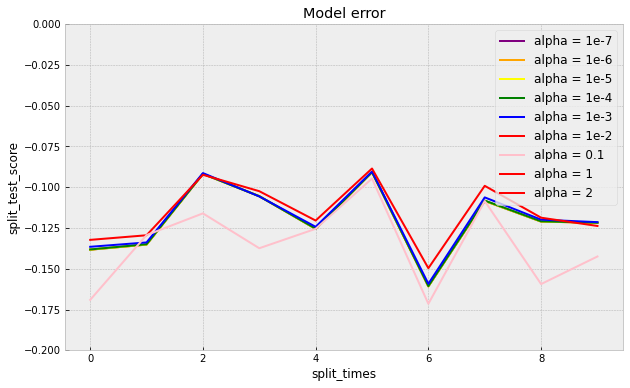

In [35]:
test_score = np.vstack((grid_search_1_2.cv_results_['split0_test_score'],
grid_search_1_2.cv_results_['split1_test_score'],
grid_search_1_2.cv_results_['split2_test_score'],
grid_search_1_2.cv_results_['split3_test_score'],
grid_search_1_2.cv_results_['split4_test_score'],
grid_search_1_2.cv_results_['split5_test_score'],
grid_search_1_2.cv_results_['split6_test_score'],
grid_search_1_2.cv_results_['split7_test_score'],
grid_search_1_2.cv_results_['split8_test_score'],
grid_search_1_2.cv_results_['split9_test_score']))

plt.figure(figsize=(10,6))
plt.plot(test_score[:,0], label='alpha = 1e-7',c='purple')
plt.plot(test_score[:,1], label='alpha = 1e-6',c='orange')
plt.plot(test_score[:,2], label='alpha = 1e-5',c='yellow')
plt.plot(test_score[:,3], label='alpha = 1e-4',c='g')
plt.plot(test_score[:,4], label='alpha = 1e-3',c='b')
plt.plot(test_score[:,5], label='alpha = 1e-2',c='r')
plt.plot(test_score[:,6], label='alpha = 0.1',c='pink')
plt.plot(test_score[:,7], label='alpha = 1',c='r')
plt.plot(test_score[:,8], label='alpha = 2',c='r')
plt.legend(fontsize=12)
plt.xlabel('split_times')
plt.ylabel('split_test_score')
plt.ylim(-0.2, 0)
plt.title('Model error')
plt.show()

In [36]:
final_model_1_1.named_steps['Linear'].intercept_

1920146284894.7778

In [37]:
final_model_1_1.named_steps['Linear'].coef_

array([ 6.29306114e-01,  7.05563712e-01,  1.71221163e-02, -2.03750727e-02,
       -1.41496205e+12, -1.41496205e+12, -1.41496205e+12, -8.56712648e+10,
       -8.56712648e+10, -8.56712648e+10, -8.56712648e+10, -8.56712648e+10,
       -8.56712648e+10,  5.67281102e+10,  5.67281102e+10,  5.67281102e+10,
        5.67281102e+10,  5.67281102e+10,  5.67281102e+10,  5.67281102e+10,
       -3.42741178e+11, -3.42741178e+11, -3.42741178e+11, -3.42741178e+11,
       -1.33499903e+11, -1.33499903e+11, -1.33499903e+11])

In [38]:
final_model_1_2.named_steps['Lasso'].intercept_

-6.064119107967519e-17

In [39]:
final_model_1_2.named_steps['Lasso'].coef_

array([ 0.61594024,  0.69711699,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ])

3. Train a multiple linear regression with and without Lasso regularization to **predict ```Unit price```**.

    1. How is the unit price affected by gross income, quantity, and other variables like day, timeslot, and product line in general?
    
    4. When using Lasso regularizer, which value for the hyperparameter $\lambda$ best works for this dataset? Which features were excluded in this model, if any?

In [40]:
X_train2 = train_final.drop('Unit price', axis=1).to_numpy()
t_train2 = train_final['Unit price'].to_numpy()
X_test2 = test_final.drop('Unit price', axis=1).to_numpy()
t_test2 = test_final['Unit price'].to_numpy()
print(X_train2.shape, t_train2.shape)
print(X_test2.shape, t_test2.shape)

(800, 27) (800,)
(200, 27) (200,)


#### The same reason as in problem 2. Instead of only using attributes ```gross income```, ```quantity```, ```day```, ```timeslot```, and ```product line```, I decide to use all attributes. 

In [41]:
corr = data_set.corr(method='pearson')
corr['Unit price'].sort_values(ascending=False)

Unit price                1.000000
gross income              0.633962
Cash                      0.029721
Monday                    0.029343
Morning                   0.028785
Night                     0.026650
Fashion accessories       0.026034
Branch_C                  0.024717
Sports and travel         0.022257
Saturday                  0.020755
Thursday                  0.019445
Gender                    0.015445
Quantity                  0.010778
Food and beverages        0.005836
Ewallet                   0.001865
Branch_B                 -0.000342
Home and lifestyle       -0.005854
Friday                   -0.008722
Health and beauty        -0.013072
Tuesday                  -0.013658
Sunday                   -0.017070
Customer type            -0.020238
Afternoon                -0.023213
Branch_A                 -0.024157
Evening                  -0.027269
Wednesday                -0.029423
Credit card              -0.032415
Electronic accessories   -0.036240
Name: Unit price, dt

In [42]:
Model_2_1 = Pipeline([('Linear', LinearRegression())]) 
Model_2_1.fit(X_train2, t_train2)
final_model_2_1 = Model_2_1

Model_2_2 = Pipeline([('Lasso', Lasso(tol=0.02))]) # original tolerance will not converge, I choose a bigger one
param_grid_2_2 = {'Lasso__alpha':[1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 2]}
grid_search_2_2 = GridSearchCV(Model_2_2, 
                             param_grid = param_grid_2_2, 
                             cv=10, 
                            scoring='neg_mean_squared_error')
grid_search_2_2.fit(X_train2, t_train2)
final_model_2_2 = grid_search_2_2.best_estimator_
print(final_model_2_1, final_model_2_2)
# store trained file
joblib.dump(final_model_2_1, 'final_model_2_1.pkl')
joblib.dump(final_model_2_2, 'final_model_2_2.pkl')

Pipeline(steps=[('Linear', LinearRegression())]) Pipeline(steps=[('Lasso', Lasso(alpha=0.01, tol=0.02))])


['final_model_2_2.pkl']

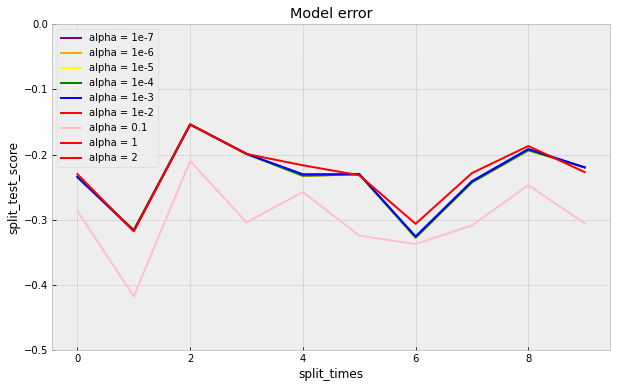

In [43]:
test_score = np.vstack((grid_search_2_2.cv_results_['split0_test_score'],
grid_search_2_2.cv_results_['split1_test_score'],
grid_search_2_2.cv_results_['split2_test_score'],
grid_search_2_2.cv_results_['split3_test_score'],
grid_search_2_2.cv_results_['split4_test_score'],
grid_search_2_2.cv_results_['split5_test_score'],
grid_search_2_2.cv_results_['split6_test_score'],
grid_search_2_2.cv_results_['split7_test_score'],
grid_search_2_2.cv_results_['split8_test_score'],
grid_search_2_2.cv_results_['split9_test_score']))

plt.figure(figsize=(10,6))
plt.plot(test_score[:,0], label='alpha = 1e-7',c='purple')
plt.plot(test_score[:,1], label='alpha = 1e-6',c='orange')
plt.plot(test_score[:,2], label='alpha = 1e-5',c='yellow')
plt.plot(test_score[:,3], label='alpha = 1e-4',c='g')
plt.plot(test_score[:,4], label='alpha = 1e-3',c='b')
plt.plot(test_score[:,5], label='alpha = 1e-2',c='r')
plt.plot(test_score[:,6], label='alpha = 0.1',c='pink')
plt.plot(test_score[:,7], label='alpha = 1',c='r')
plt.plot(test_score[:,8], label='alpha = 2',c='r')
plt.legend(fontsize=10)
plt.xlabel('split_times')
plt.ylabel('split_test_score')
plt.ylim(-0.5, 0)
plt.title('Model error')
plt.show()

In [44]:
final_model_2_1.named_steps['Linear'].intercept_

0.00693892478072832

In [45]:
final_model_2_1.named_steps['Linear'].coef_

array([-8.71967054e-01,  1.23447296e+00, -2.93000003e-02,  4.48474280e-02,
       -1.85361719e-02,  3.36627186e-02, -1.51265467e-02, -7.44256614e-03,
       -1.10567955e-03, -3.57701774e-02,  4.56930275e-02, -4.32013834e-02,
        4.18267790e-02,  3.48762729e-02,  5.09012196e-02, -4.49093754e-02,
       -6.83679168e-03,  1.09882793e-02, -9.09005386e-02,  4.58809338e-02,
       -4.46020363e-02, -2.37846618e-02,  3.83981137e-02,  2.99885844e-02,
        6.63087653e-03, -4.18346101e-02,  3.52037336e-02])

In [46]:
final_model_2_2.named_steps['Lasso'].intercept_

0.002980710337335457

In [47]:
final_model_2_2.named_steps['Lasso'].coef_

array([-0.83603962,  1.1993046 , -0.        ,  0.01198485, -0.        ,
        0.00910666, -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.01776226,  0.        ,
       -0.00904462, -0.        ,  0.        ,  0.        ,  0.        ,
       -0.01596842,  0.        ])

---

#### Question 4 and 5 are required for completion for the EEL 5934 section only. Individuals in EEL 4930 are welcome to solve these tasks but no extra credit will be credited.

4. Train a logistic regression to **classify gender** and study the relationship between attributes. Namely, explain the relationship between gender, product line, payment and gross income for branch C. To study this relationship, consider all the interaction attribution of degree 2. (See ```interaction_only``` variable in [```PolynomialFeatures```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)).

    1. For ```Gender=male``` customers, plot the parameters values for all attributes (and its 2nd-order interactions).
    2. Which attributes are the most informative?

In [48]:
train3 = train_final.drop(['Unit price', 'Quantity', 
                             'Customer type', 'Branch_A', 'Branch_B',
                            'Monday', 'Tuesday', 'Wednesday', 'Thursday',
                            'Friday', 'Saturday', 'Sunday', 'Morning',
                            'Afternoon', 'Evening', 'Night'], axis=1)

test3 = test_final.drop(['Unit price', 'Quantity', 
                             'Customer type', 'Branch_A', 'Branch_B',
                            'Monday', 'Tuesday', 'Wednesday', 'Thursday',
                            'Friday', 'Saturday', 'Sunday', 'Morning',
                            'Afternoon', 'Evening', 'Night'], axis=1)

# For Branch C
train3_C = train3.query('Branch_C == 1')
test3_C = test3.query('Branch_C == 1')

X_train3 = train3_C.drop('Gender', axis=1)
X_test3 = test3_C.drop('Gender', axis=1)
t_train3 = train3_C['Gender']
t_test3 = test3_C['Gender']

print(X_train3.shape, t_train3.shape)
print(X_test3.shape, t_test3.shape)

(264, 11) (264,)
(64, 11) (64,)


In [49]:
X_train3

,gross income,Branch_C,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Cash,Credit card,Ewallet
535,-0.808736,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
557,2.940413,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
141,2.594209,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
664,-0.459467,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
708,-0.773037,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
71,1.369112,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
106,-0.603302,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
860,-0.940052,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
435,2.543098,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [51]:
Poly = PolynomialFeatures(interaction_only=True)
X_train3_interaction = Poly.fit_transform(X_train3)
X_test3_interaction = Poly.transform(X_test3)
X_train3_interaction.shape

(264, 67)

In [52]:
#prepare dataset for evaluation in test set
data_3 = np.vstack((np.hstack((X_train3_interaction, t_train3.to_numpy().reshape(-1,1))), 
                    np.hstack((X_test3_interaction, t_test3.to_numpy().reshape(-1,1)))))
print(data_3.shape)
joblib.dump(data_3, 'data_3.pkl')

(328, 68)


['data_3.pkl']

In [53]:
X_train3_interaction_columns = Poly.get_feature_names_out()
X_train3_interaction_columns.shape

(67,)

In [54]:
Model_3 = Pipeline([('Log_reg', LogisticRegression(random_state=1, max_iter=1000))])
param_grid_3 = {'Log_reg__penalty':['l2', 'none'],
                  'Log_reg__solver':['newton-cg', 'lbfgs', 'sag', 'saga']}
girdsearch_3 = GridSearchCV(Model_3,
                              param_grid=param_grid_3,
                              scoring='accuracy',
                              cv=10)
girdsearch_3.fit(X_train3_interaction, t_train3)
print(girdsearch_3.best_params_)
final_Model_3 = girdsearch_3.best_estimator_
joblib.dump(final_Model_3, 'final_Model_3.pkl')

{'Log_reg__penalty': 'none', 'Log_reg__solver': 'newton-cg'}


['final_Model_3.pkl']

In [55]:
final_Model_3.score(X_test3_interaction, t_test3)

0.5625

In [56]:
print(final_Model_3.named_steps['Log_reg'].intercept_)
print(final_Model_3.named_steps['Log_reg'].intercept_.shape,'\n')
print(final_Model_3.named_steps['Log_reg'].coef_)
print(final_Model_3.named_steps['Log_reg'].coef_.shape)

[-0.06923346]
(1,) 

[[-0.06923346 -0.0498674  -0.06923346 -0.01690492  0.04023826 -0.07714825
   0.21138525 -0.02073796 -0.20606584  0.01592835 -0.09812317  0.01296136
  -0.0498674   0.51725371 -0.19041    -0.38406656  0.28252516  0.03408766
  -0.30925736  0.22646734 -0.19178834 -0.08454639 -0.01690492  0.04023826
  -0.07714825  0.21138525 -0.02073796 -0.20606584  0.01592835 -0.09812317
   0.01296136  0.          0.          0.          0.          0.
  -0.32213482 -0.266666    0.57189589  0.          0.          0.
   0.          0.78140812 -0.28058153 -0.46058833  0.          0.
   0.          0.14947586 -0.34130781  0.1146837   0.          0.
  -0.01035169  0.67649437 -0.45475743  0.         -0.33587047 -0.07388896
   0.38902147 -0.24659866  0.18782676 -0.14729395  0.          0.
   0.        ]]
(1, 67)


In [57]:
## the first term of coefficient is automatically set to 1, which is intercept
X_train3_interaction_columns[0] = 'Intercept'

In [58]:
X_train3_interaction_columns

array(['Intercept', 'gross income', 'Branch_C', 'Electronic accessories',
       'Fashion accessories', 'Food and beverages', 'Health and beauty',
       'Home and lifestyle', 'Sports and travel', 'Cash', 'Credit card',
       'Ewallet', 'gross income Branch_C',
       'gross income Electronic accessories',
       'gross income Fashion accessories',
       'gross income Food and beverages',
       'gross income Health and beauty',
       'gross income Home and lifestyle',
       'gross income Sports and travel', 'gross income Cash',
       'gross income Credit card', 'gross income Ewallet',
       'Branch_C Electronic accessories', 'Branch_C Fashion accessories',
       'Branch_C Food and beverages', 'Branch_C Health and beauty',
       'Branch_C Home and lifestyle', 'Branch_C Sports and travel',
       'Branch_C Cash', 'Branch_C Credit card', 'Branch_C Ewallet',
       'Electronic accessories Fashion accessories',
       'Electronic accessories Food and beverages',
       'Electronic 

In [59]:
interaction = pd.DataFrame(np.hstack((X_train3_interaction_columns.reshape(-1,1), 
                                      final_Model_3.named_steps['Log_reg'].coef_.T)),
                           columns=['Attributes', 'Coefficients'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(interaction)

                                    Attributes Coefficients
0                                    Intercept    -0.069233
1                                 gross income    -0.049867
2                                     Branch_C    -0.069233
3                       Electronic accessories    -0.016905
4                          Fashion accessories     0.040238
5                           Food and beverages    -0.077148
6                            Health and beauty     0.211385
7                           Home and lifestyle    -0.020738
8                            Sports and travel    -0.206066
9                                         Cash     0.015928
10                                 Credit card    -0.098123
11                                     Ewallet     0.012961
12                       gross income Branch_C    -0.049867
13         gross income Electronic accessories     0.517254
14            gross income Fashion accessories     -0.19041
15             gross income Food and bev

In [60]:
# gender male is encode as 1, so coefficient > 0 contribute to it
print(interaction.query('Coefficients > 0').sort_values(by=['Coefficients'], ascending=False))

                             Attributes Coefficients
43             Fashion accessories Cash     0.781408
55        Health and beauty Credit card     0.676494
38       Electronic accessories Ewallet     0.571896
13  gross income Electronic accessories     0.517254
60           Home and lifestyle Ewallet     0.389021
16       gross income Health and beauty     0.282525
19                    gross income Cash     0.226467
25           Branch_C Health and beauty     0.211385
6                     Health and beauty     0.211385
62        Sports and travel Credit card     0.187827
49              Food and beverages Cash     0.149476
51           Food and beverages Ewallet     0.114684
23         Branch_C Fashion accessories     0.040238
4                   Fashion accessories     0.040238
17      gross income Home and lifestyle     0.034088
28                        Branch_C Cash     0.015928
9                                  Cash     0.015928
30                     Branch_C Ewallet     0.

5. Train a logistic regression to **classify customer type** and study the relationship between attributes. Namely, explain the relationship between customer type, gender, day and timeslot for branch C. To study this relationship, consider all the interaction attribution of degree 2. (See ```interaction_only``` variable in [```PolynomialFeatures```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)).

    1. For ```Customer type = Normal``` customers, plot the parameters values for all attributes (and its 2nd-order interactions).
    2. Which attributes are the most informative?

In [61]:
train4 = train_final.drop(['Unit price', 'Quantity','gross income', 
                             'Branch_A', 'Branch_B', 'Electronic accessories',
                           'Fashion accessories', 'Food and beverages',
                           'Health and beauty', 'Home and lifestyle',
                           'Sports and travel', 'Cash', 'Credit card',
                           'Ewallet'], axis=1)

test4 = test_final.drop(['Unit price', 'Quantity','gross income', 
                             'Branch_A', 'Branch_B', 'Electronic accessories',
                           'Fashion accessories', 'Food and beverages',
                           'Health and beauty', 'Home and lifestyle',
                           'Sports and travel', 'Cash', 'Credit card',
                           'Ewallet'], axis=1)

# For Branch C
train4_C = train4.query('Branch_C == 1')
test4_C = test4.query('Branch_C == 1')

X_train4 = train4_C.drop('Customer type', axis=1)
X_test4 = test4_C.drop('Customer type', axis=1)
t_train4 = train4_C['Customer type']
t_test4 = test4_C['Customer type']

print(X_train4.shape, t_train4.shape)
print(X_test4.shape, t_test4.shape)

(264, 13) (264,)
(64, 13) (64,)


In [62]:
X_train4

,Gender,Branch_C,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Afternoon,Evening,Morning,Night
535,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
557,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
141,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
664,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
708,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
106,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
860,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
435,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [63]:
Poly2 = PolynomialFeatures(interaction_only=True)
X_train4_interaction = Poly2.fit_transform(X_train4)
X_test4_interaction = Poly2.transform(X_test4)
X_train4_interaction.shape

(264, 92)

In [64]:
#prepare dataset for evaluation in test set
data_4 = np.vstack((np.hstack((X_train4_interaction, t_train4.to_numpy().reshape(-1,1))), 
                    np.hstack((X_test4_interaction, t_test4.to_numpy().reshape(-1,1)))))
print(data_4.shape)
joblib.dump(data_4, 'data_4.pkl')

(328, 93)


['data_4.pkl']

In [65]:
X_train4_interaction_columns = Poly2.get_feature_names_out()
X_train4_interaction_columns.shape

(92,)

In [66]:
Model_4 = Pipeline([('Log_reg', LogisticRegression(random_state=1, max_iter=2000))])
param_grid_4 = {'Log_reg__penalty':['l2', 'none'],
                  'Log_reg__solver':['newton-cg', 'lbfgs', 'sag', 'saga']}
girdsearch_4 = GridSearchCV(Model_4,
                              param_grid=param_grid_4,
                              scoring='accuracy',
                              cv=10)
girdsearch_4.fit(X_train4_interaction, t_train4)
print(girdsearch_4.best_params_)
final_Model_4 = girdsearch_4.best_estimator_
joblib.dump(final_Model_4, 'final_Model_4.pkl')

{'Log_reg__penalty': 'none', 'Log_reg__solver': 'newton-cg'}


['final_Model_4.pkl']

In [67]:
final_Model_4.score(X_test4_interaction, t_test4)

0.484375

In [68]:
print(final_Model_4.named_steps['Log_reg'].intercept_)
print(final_Model_4.named_steps['Log_reg'].intercept_.shape,'\n')
print(final_Model_4.named_steps['Log_reg'].coef_)
print(final_Model_4.named_steps['Log_reg'].coef_.shape)

[-0.0771239]
(1,) 

[[-0.0771239   0.2148286  -0.0771239  -0.37550001 -0.20164008  0.19127559
  -0.03077574  0.50018292 -0.25165915  0.09099256 -0.01358863 -0.13216915
   0.03674011  0.03189377  0.2148286   1.14607534  0.28090555 -0.22192978
   0.65483652 -1.77217762  0.17333097 -0.04621237 -0.03883066  0.3656786
   0.09526251 -0.20728185 -0.37550001 -0.20164008  0.19127559 -0.03077574
   0.50018292 -0.25165915  0.09099256 -0.01358863 -0.13216915  0.03674011
   0.03189377  0.          0.          0.          0.          0.
   0.         -0.20419994  0.44862571  0.90887363 -1.5287994   0.
   0.          0.          0.          0.          0.67553669 -0.81052776
  -1.17279099  1.10614199  0.          0.          0.          0.
   0.02447267  0.01905067 -0.88984109  1.03759335  0.          0.
   0.         -1.23340432  0.59825276  0.5770382   0.02733764  0.
   0.         -0.55052319  0.27654573  0.83203453 -0.05787415  0.
   1.48558386 -1.03529245 -0.28132593 -0.42062463 -0.21105439  0.37

In [69]:
## the first row of coefficient is automatically set to 1, which is intercept
X_train4_interaction_columns[0] = 'Intercept'

In [70]:
X_train4_interaction_columns

array(['Intercept', 'Gender', 'Branch_C', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Afternoon',
       'Evening', 'Morning', 'Night', 'Gender Branch_C', 'Gender Friday',
       'Gender Monday', 'Gender Saturday', 'Gender Sunday',
       'Gender Thursday', 'Gender Tuesday', 'Gender Wednesday',
       'Gender Afternoon', 'Gender Evening', 'Gender Morning',
       'Gender Night', 'Branch_C Friday', 'Branch_C Monday',
       'Branch_C Saturday', 'Branch_C Sunday', 'Branch_C Thursday',
       'Branch_C Tuesday', 'Branch_C Wednesday', 'Branch_C Afternoon',
       'Branch_C Evening', 'Branch_C Morning', 'Branch_C Night',
       'Friday Monday', 'Friday Saturday', 'Friday Sunday',
       'Friday Thursday', 'Friday Tuesday', 'Friday Wednesday',
       'Friday Afternoon', 'Friday Evening', 'Friday Morning',
       'Friday Night', 'Monday Saturday', 'Monday Sunday',
       'Monday Thursday', 'Monday Tuesday', 'Monday Wednesday',
       'Monday Afternoon

In [71]:
interaction2 = pd.DataFrame(np.hstack((X_train4_interaction_columns.reshape(-1,1), 
                                       final_Model_4.named_steps['Log_reg'].coef_.T)),
                           columns=['Attributes', 'Coefficients'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(interaction2)

             Attributes Coefficients
0             Intercept    -0.077124
1                Gender     0.214829
2              Branch_C    -0.077124
3                Friday      -0.3755
4                Monday     -0.20164
5              Saturday     0.191276
6                Sunday    -0.030776
7              Thursday     0.500183
8               Tuesday    -0.251659
9             Wednesday     0.090993
10            Afternoon    -0.013589
11              Evening    -0.132169
12              Morning      0.03674
13                Night     0.031894
14      Gender Branch_C     0.214829
15        Gender Friday     1.146075
16        Gender Monday     0.280906
17      Gender Saturday     -0.22193
18        Gender Sunday     0.654837
19      Gender Thursday    -1.772178
20       Gender Tuesday     0.173331
21     Gender Wednesday    -0.046212
22     Gender Afternoon    -0.038831
23       Gender Evening     0.365679
24       Gender Morning     0.095263
25         Gender Night    -0.207282
2

In [72]:
# Customer type = Normal is set to 1 through ordinal encoding
print(interaction2.query('Coefficients > 0').sort_values(by=['Coefficients'], ascending=False))

            Attributes Coefficients
78   Tuesday Afternoon     1.485584
15       Gender Friday     1.146075
55        Monday Night     1.106142
63      Saturday Night     1.037593
45      Friday Morning     0.908874
75    Thursday Morning     0.832035
52    Monday Afternoon     0.675537
18       Gender Sunday     0.654837
68      Sunday Evening     0.598253
69      Sunday Morning     0.577038
7             Thursday     0.500183
30   Branch_C Thursday     0.500183
44      Friday Evening     0.448626
83   Wednesday Evening     0.371176
23      Gender Evening     0.365679
16       Gender Monday     0.280906
74    Thursday Evening     0.276546
1               Gender     0.214829
14     Gender Branch_C     0.214829
5             Saturday     0.191276
28   Branch_C Saturday     0.191276
20      Gender Tuesday     0.173331
24      Gender Morning     0.095263
32  Branch_C Wednesday     0.090993
9            Wednesday     0.090993
84   Wednesday Morning     0.062752
12             Morning      

---

For what follows, use accuracy as one of your metrics of success and report its 95% confidence interval. Carry any necessary hyperparameter tuning with pipelines. Choose the best CV strategy and report on the best hyperparameter settings.

6. Train a classifier to **predict the day of purchase** (Monday, Tuesday, etc.).

    1. Select at least 2 classifiers.

In [73]:
# load the data we get from problem1 and spilt it into train and test set
train5 = data_day[:800]
test5 = data_day[800:1000]
X_train5 = train5.drop(['Date'], axis=1)
X_test5 = test5.drop(['Date'], axis=1)
t_train5 = train5['Date']
t_test5 = test5['Date']
print(X_train5.shape, X_test5.shape, t_train5.shape, t_test5.shape)

(800, 21) (200, 21) (800,) (200,)


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [75]:
Model_5_1 = Pipeline([('Log_reg', LogisticRegression(max_iter=1000))])
Model_5_1.get_params()

{'memory': None,
 'steps': [('Log_reg', LogisticRegression(max_iter=1000))],
 'verbose': False,
 'Log_reg': LogisticRegression(max_iter=1000),
 'Log_reg__C': 1.0,
 'Log_reg__class_weight': None,
 'Log_reg__dual': False,
 'Log_reg__fit_intercept': True,
 'Log_reg__intercept_scaling': 1,
 'Log_reg__l1_ratio': None,
 'Log_reg__max_iter': 1000,
 'Log_reg__multi_class': 'auto',
 'Log_reg__n_jobs': None,
 'Log_reg__penalty': 'l2',
 'Log_reg__random_state': None,
 'Log_reg__solver': 'lbfgs',
 'Log_reg__tol': 0.0001,
 'Log_reg__verbose': 0,
 'Log_reg__warm_start': False}

In [76]:
param_grid_5_1 = {'Log_reg__penalty':['l2', 'none'],
                  'Log_reg__solver':['newton-cg', 'lbfgs', 'sag', 'saga']}
girdsearch_5_1 = GridSearchCV(Model_5_1,
                              param_grid=param_grid_5_1,
                              scoring='accuracy',
                              cv=10)
girdsearch_5_1.fit(X_train5, t_train5)
print(girdsearch_5_1.best_params_)
final_Model_5_1 = girdsearch_5_1.best_estimator_
joblib.dump(final_Model_5_1, 'final_Model_5_1.pkl')

{'Log_reg__penalty': 'l2', 'Log_reg__solver': 'newton-cg'}


['final_Model_5_1.pkl']

In [77]:
Model_5_2 = Pipeline([('DT', DecisionTreeClassifier())])
Model_5_2.get_params()

{'memory': None,
 'steps': [('DT', DecisionTreeClassifier())],
 'verbose': False,
 'DT': DecisionTreeClassifier(),
 'DT__ccp_alpha': 0.0,
 'DT__class_weight': None,
 'DT__criterion': 'gini',
 'DT__max_depth': None,
 'DT__max_features': None,
 'DT__max_leaf_nodes': None,
 'DT__min_impurity_decrease': 0.0,
 'DT__min_samples_leaf': 1,
 'DT__min_samples_split': 2,
 'DT__min_weight_fraction_leaf': 0.0,
 'DT__random_state': None,
 'DT__splitter': 'best'}

In [78]:
param_grid_5_2 = {'DT__criterion':['gini', 'entropy'],
                 'DT__max_depth':[1, 2, 3, 4, 5],
                 'DT__min_samples_split':[2, 3, 4, 5],
                 'DT__min_samples_leaf':[1, 2, 3, 4]}
girdsearch_5_2 = GridSearchCV(Model_5_2,
                              param_grid=param_grid_5_2,
                              scoring='accuracy',
                              cv=10)
girdsearch_5_2.fit(X_train5, t_train5)
print(girdsearch_5_2.best_params_)
final_Model_5_2 = girdsearch_5_2.best_estimator_
joblib.dump(final_Model_5_2, 'final_Model_5_2.pkl')

{'DT__criterion': 'gini', 'DT__max_depth': 1, 'DT__min_samples_leaf': 1, 'DT__min_samples_split': 2}


['final_Model_5_2.pkl']

In [79]:
Model_5_3 = Pipeline([('Random_Forest', RandomForestClassifier())])
Model_5_3.get_params()

{'memory': None,
 'steps': [('Random_Forest', RandomForestClassifier())],
 'verbose': False,
 'Random_Forest': RandomForestClassifier(),
 'Random_Forest__bootstrap': True,
 'Random_Forest__ccp_alpha': 0.0,
 'Random_Forest__class_weight': None,
 'Random_Forest__criterion': 'gini',
 'Random_Forest__max_depth': None,
 'Random_Forest__max_features': 'auto',
 'Random_Forest__max_leaf_nodes': None,
 'Random_Forest__max_samples': None,
 'Random_Forest__min_impurity_decrease': 0.0,
 'Random_Forest__min_samples_leaf': 1,
 'Random_Forest__min_samples_split': 2,
 'Random_Forest__min_weight_fraction_leaf': 0.0,
 'Random_Forest__n_estimators': 100,
 'Random_Forest__n_jobs': None,
 'Random_Forest__oob_score': False,
 'Random_Forest__random_state': None,
 'Random_Forest__verbose': 0,
 'Random_Forest__warm_start': False}

In [80]:
param_grid_5_3 = {'Random_Forest__criterion':['gini', 'entropy'],
                 'Random_Forest__max_depth':[1, 2, 3, 4, 5],
                 'Random_Forest__min_samples_split':[2, 4, 6, 8],
                 'Random_Forest__min_samples_leaf':[1, 2, 3, 4],
                 'Random_Forest__n_estimators':[100, 150, 200]}
girdsearch_5_3 = GridSearchCV(Model_5_3,
                              param_grid=param_grid_5_3,
                              scoring='accuracy',
                              cv=10)
girdsearch_5_3.fit(X_train5, t_train5)
print(girdsearch_5_3.best_params_)
final_Model_5_3 = girdsearch_5_3.best_estimator_
joblib.dump(final_Model_5_3, 'final_Model_5_3.pkl')

{'Random_Forest__criterion': 'entropy', 'Random_Forest__max_depth': 4, 'Random_Forest__min_samples_leaf': 3, 'Random_Forest__min_samples_split': 2, 'Random_Forest__n_estimators': 100}


['final_Model_5_3.pkl']

---

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

---